## 1. 비지도 학습
비지도 학습(Unsupervised Learning)은 정답(label)이 주어지지 않은 데이터를 기반으로 데이터의 구조, 패턴, 분포 등을 스스로 학습하는 방법입니다. 즉, 입력 데이터만 가지고 유사한 데이터끼리 그룹화하거나(클러스터링), 데이터를 더 작은 차원으로 축소(차원 축소)하거나, 중요한 특징을 추출하는 것이 목표입니다. 대표적인 알고리즘으로는 K-means, PCA, Autoencoder, GAN 등이 있으며, 비지도 학습은 레이블링 비용이 많이 드는 현실적인 문제를 해결하고, 데이터에 대한 통찰을 얻는 데 유용하게 활용됩니다.

### 대표적인 비지도 학습 알고리즘
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FDhEPc%2FbtsPNGyfQyq%2FAAAAAAAAAAAAAAAAAAAAAHsV_oUG1FzRBxWiewN-Wr9j-zsngoF2TEjfQGdHZY0G%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DP6uhx7F6wQW8kALMhEimQ%252FcN%252BJQ%253D">

## 2. 클러스터링
클러스터링(Clustering)은 비지도 학습의 대표적인 기법으로, 정답(label) 없이 주어진 데이터를 유사한 특성을 가진 그룹(클러스터)으로 자동으로 나누는 방법입니다. 데이터 간의 거리나 밀도, 연결 구조 등을 기준으로 군집을 형성하며, 대표적인 알고리즘으로는 K-means, DBSCAN, 계층적 군집(Hierarchical Clustering) 등이 있습니다. 클러스터링은 고객 세분화, 문서 분류, 이미지 분할, 이상치 탐지 등 다양한 분야에 활용되며, 데이터를 시각적으로 이해하거나 패턴을 탐색할 때 매우 유용한 도구입니다.

### 2-1. k-means
> K-Means는 가장 널리 사용되는 클러스터링 알고리즘 중 하나로, 주어진 데이터를 K개의 클러스터로 나누는 비지도 학습 기법입니다.

알고리즘은 먼저 무작위로 K개의 중심점을 선택한 후, 각 데이터를 가장 가까운 중심점에 할당하고, 각 클러스터의 중심을 다시 계산하는 과정을 반복합니다. 이 과정을 통해 중심점이 더 이상 크게 이동하지 않을 때까지 수렴하며, 최종적으로 데이터는 유사한 특성을 가진 K개의 그룹으로 분류됩니다. K-Means는 계산이 빠르고 구현이 간단하지만, 클러스터 수(K)를 사전에 정해야 하며, 복잡한 형태나 밀도 차이가 큰 데이터에는 적합하지 않을 수 있습니다.

1. "몇 개의 그룹으로 나눌 것인지" 결정해야 합니다. 예를 들어 K=2이라면, 2개의 클러스터로 나누게 됩니다.

2. 데이터 공간에서 K개의 중심점을 무작위로 뽑습니다. 이 중심점은 클러스터의 대표값 역할을 합니다.

3. 모든 데이터 포인트에 대해 각 중심점과의 거리를 계산하고, 가장 가까운 중심점에 소속되도록 할당합니다. 이로써 K개의 그룹이 만들어집니다.

4. 각 클러스터에 속한 데이터들의 평균값을 계산해서 중심점을 새로 위치시킵니다. 즉, 중심점이 데이터 분포의 중심으로 이동합니다.

5. 데이터의 소속 그룹이 바뀌지 않을 때까지, 또는 중심점의 이동이 거의 없을 때까지 반복합니다. 이를 수렴(convergence)이라고 합니다.

In [ ]:
# make_blobs : blob 데이터를 만듦
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
# center : 3 -> 레이블이 3개 만들어짐
X, y = make_blobs(n_samples=100, centers=3, random_state=2025)
# 지도학습 데이터임
print(X) # -> X1 , X2
print(y) # -> 레이블 3개  0, 1, 2

[[10.08755008  0.6382729 ]
 [-2.84528491 -4.19928722]
 [-6.08423803  7.75892314]
 [-6.43263275  6.56285565]
 [-1.95189159 -5.34779925]
 [ 7.04310741 -0.27258836]
 [-3.18545155 -6.28523417]
 [-7.6623194   6.89752652]
 [-2.0708511  -2.50176812]
 [ 7.45006141 -1.5341477 ]
 [ 8.98531829 -1.19709903]
 [-6.54168118  8.03522044]
 [-8.3317329   6.92895797]
 [ 7.09099404 -0.04838319]
 [ 8.63422404 -1.81827114]
 [-6.89564043  6.59075961]
 [-8.34403241  7.66827539]
 [ 6.39177271 -1.91906413]
 [ 7.68737327 -1.52884924]
 [-2.92043816 -5.07630038]
 [-6.52664944  7.9620877 ]
 [ 8.11264486 -0.91083917]
 [-1.95818681 -6.23856568]
 [-8.19114307  6.49778601]
 [ 8.01105229 -0.2545059 ]
 [-7.20324561  7.82328962]
 [-8.68100584  6.91076403]
 [ 9.58622846 -1.74411022]
 [ 7.10826722 -0.15009782]
 [-1.18848108 -4.30959714]
 [-1.37653917 -4.00568529]
 [-7.39997874  6.36379833]
 [-5.70126022  7.56825104]
 [ 7.87588635 -1.68089092]
 [ 8.11366874 -0.7574711 ]
 [10.12375532 -0.29528407]
 [-6.22675495  7.79415406]
 

In [ ]:
X = pd.DataFrame(X)
X

,0,1
0,10.087550,0.638273
1,-2.845285,-4.199287
2,-6.084238,7.758923
3,-6.432633,6.562856
4,-1.951892,-5.347799
...,...,...
95,7.616818,-1.465081
96,-0.396105,-5.548016
97,-8.724507,9.287807
98,-8.717965,8.100324


<Axes: xlabel='0', ylabel='1'>

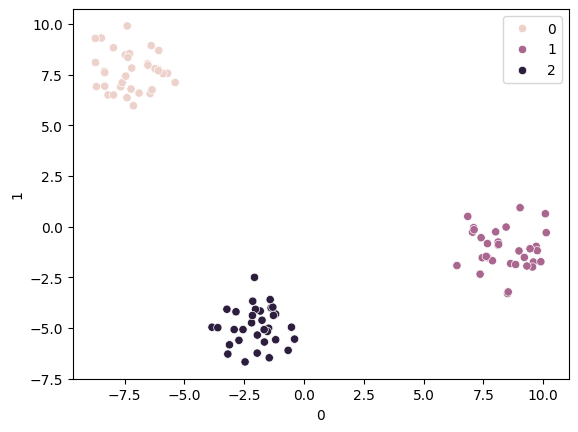

In [ ]:
sns.scatterplot(x=X[0], y=X[1], hue=y)

In [ ]:
km = KMeans(n_clusters=3)   # k는 내 마음대로
km.fit(X)
pred = km.predict(X)

<Axes: xlabel='0', ylabel='1'>

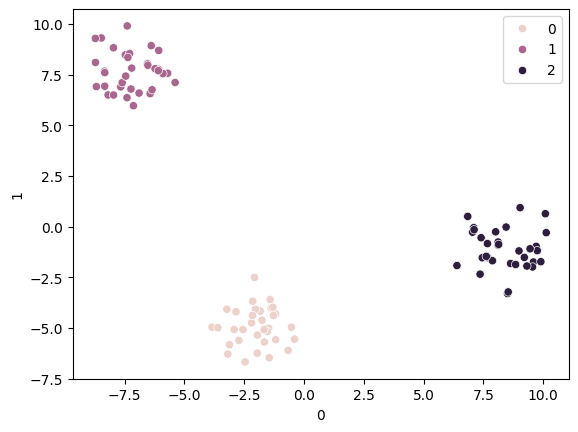

In [ ]:
# 알아서 예측해서 레이블로 나눠줌
sns.scatterplot(x=X[0], y=X[1], hue=pred)

<Axes: xlabel='0', ylabel='1'>

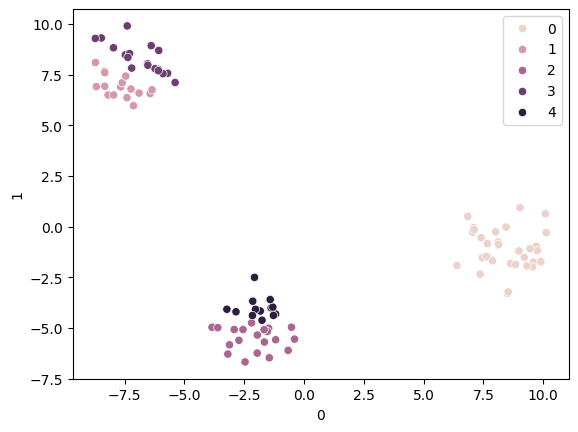

In [ ]:
km = KMeans(n_clusters=5)
km.fit(X)
pred = km.predict(X)

sns.scatterplot(x=X[0], y=X[1], hue=pred)

In [ ]:
'''
inertia_는 각 데이터 포인트와 자신이 속한 클러스터 중심점(centroid) 사이의 거리 제곱합(Sum of Squared Distances)입니다.
즉, 클러스터 내에서 데이터들이 중심점에 얼마나 가까이 모여 있는지를 수치로 나타냅니다.
'''
km.inertia_     # 값이 클 수록 멀리 떨어져있고, 작을 수록 조밀하다

137.1898517347811

In [ ]:
inertia_list = []

for i in range(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia_list.append(km.inertia_)

inertia_list

[2202.099288979431,
 178.3026813479228,
 149.2341882048366,
 126.5038943280692,
 115.74686895840314,
 99.59108125693282,
 80.23459580957555,
 77.14909119779013,
 59.70714226169768]

<Axes: >

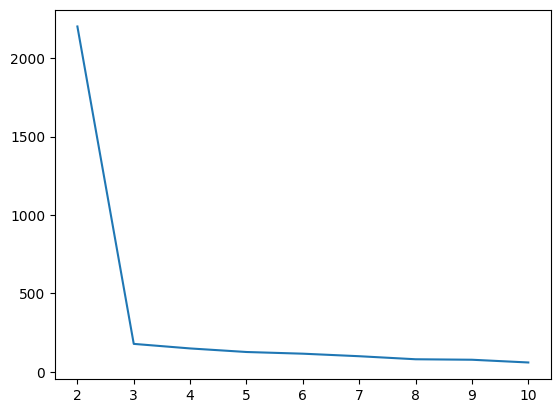

In [ ]:
sns.lineplot(x=range(2, 11), y=inertia_list)

> 엘보우(Elbow) 메서드: 클러스터링에서 최적의 클러스터 수(K)를 찾기 위한 직관적인 방법입니다. 이 방법은 K를 1부터 점차 늘려가며 각 K 값에 대한 클러스터 내 거리 제곱합(inertia_)을 계산하고, 이를 그래프로 나타냅니다. K가 증가할수록 inertia 값은 감소하지만, 어느 순간부터 감소 속도가 완만해지는데, 이때 그래프가 팔꿈치(elbow)처럼 꺾이는 지점을 최적의 K로 선택합니다. 이 지점은 모델이 충분히 군집을 잘 나누되, 과도하게 세분화하지 않는 균형점으로 간주됩니다.

### 2-2. 계층적 군집
계층적 군집(Hierarchical Clustering)은 데이터 간의 유사도를 기준으로 계층 구조의 트리(dendrogram)를 생성하며, 이를 통해 데이터를 점진적으로 군집화하는 비지도 학습 기법입니다.

 >병합형(agglomerative)과 분할형(divisive)으로 나뉘며, 병합형은 각 데이터를 개별 클러스터로 시작해 가장 유사한 것부터 합쳐가고, 분할형은 전체 데이터를 하나의 클러스터로 시작해 점차 분리해 나갑니다.

이 알고리즘은 클러스터 수를 사전에 정하지 않아도 되며, 덴드로그램을 통해 적절한 군집 수를 시각적으로 판단할 수 있는 장점이 있습니다. 하지만 계산 복잡도가 높아 대용량 데이터에는 다소 비효율적일 수 있습니다.

</br>

#### 병합형 계층적 군집의 예

1. 처음에는 N개의 데이터가 있으면 N개의 클러스터로 간주합니다.

2. 데이터 간 거리(혹은 클러스터 간 거리)를 계산해서 가장 가까운 두 개를 선택해 합칩니다.

3. 두 클러스터가 합쳐졌기 때문에, 새로 생긴 클러스터와 나머지 클러스터들과의 거리를 다시 계산합니다.

4. Step 2로 돌아가 계속 합칩니다.

5. 모든 데이터가 하나의 클러스터가 될 때까지 반복

In [ ]:
import torch
import numpy as np
# transform 차기 버전
from torchvision.transforms import v2
from torchvision.datasets import MNIST

In [ ]:
# ToImage : 이미지의 의미를 가진 텐서로 변환
# C, H, W로 변환 = PIL 이미지, Numpy 배열
# dtype 범위 유지 (입력한대로)
# 스케일과 정규화는 하지 않음 왜냐면 dtype에서 int면 그대로 가져오기때문에
# 위에가 ToTensor와 다른점임

transforms = v2.Compose([
    v2.ToImage(),   # ToTensor와 유사
    v2.Lambda(torch.flatten),
])

# 내 현재 디렉토리에 다운로드 -> "."
flatten_mnist = MNIST(".", train=False, download=True, transform=transforms)

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.13MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.76MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.92MB/s]


In [ ]:
len(flatten_mnist)

10000

In [ ]:
np.random.seed(2025)
# 10000개 중에서 30개만 뽑아서 덮어쓰지 않고
mnist_indices = np.random.choice(len(flatten_mnist), 30, replace=False)
mnist_indices   # 인덱스 번호

array([6448, 3544, 3904, 9739, 8295, 3600, 1457, 6938,  984, 9586, 9652,
       6662, 2470, 6386, 6193, 2565, 1394, 5215,  592, 6296, 5188, 3458,
       3048, 7557, 3524, 1684, 8461, 8814, 5643, 9259])

In [ ]:
flatten_X = np.array([flatten_mnist[idx][0].numpy() for idx in mnist_indices])
flatten_y = np.array([flatten_mnist[idx][1] for idx in mnist_indices])
flatten_X   #
flatten_y   # 30개 정답

array([4, 4, 2, 0, 2, 2, 0, 1, 1, 7, 7, 7, 8, 5, 2, 7, 8, 3, 0, 8, 8, 0,
       2, 9, 6, 5, 3, 6, 2, 2])

In [ ]:
# 병합형 군집 알고리즘
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [ ]:
# 샘플을 하나씩 클러스터로 시작해, 가장 가까운 두 클러스터를 반복적으로 병합
# compute_distances = True, model.distances_ 에 병합 거리를 저장 -> 덴드로그램으로 시각화할 때, 활용하기 위해서
model = AgglomerativeClustering(compute_distances=True)
model = model.fit(flatten_X)

# 기본 하이퍼 파라미터
# n_clusters = 2 : 최종적으로 2개 클러스터가 되면 멈춤
# metric = 'euclidean' : 어떻게 거리계산 할건지? -> 샘플 간 거리는 유클리드 계산

# 속성
# model.labels_ : 각 샘플의 군집 라벨 ex. 0,1,3,...
# model.children_ : 병합된 두 클러스터의 인덱스 기록 -> 덴드로그램 시각화용
# model.distances_ : 병합 시의 거리
# model.n_clusters_ : 최종 군집 개수

In [ ]:
def plot_dendrogram(model,labels):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                # 올라가는 전체적인 노드 개수 셀 수 있음
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count   # 계층에 따라 넣어줄 수 있을 것

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
        ).astype(float)

    dendrogram(linkage_matrix, labels=labels, truncate_mode=None, distance_sort='descending')

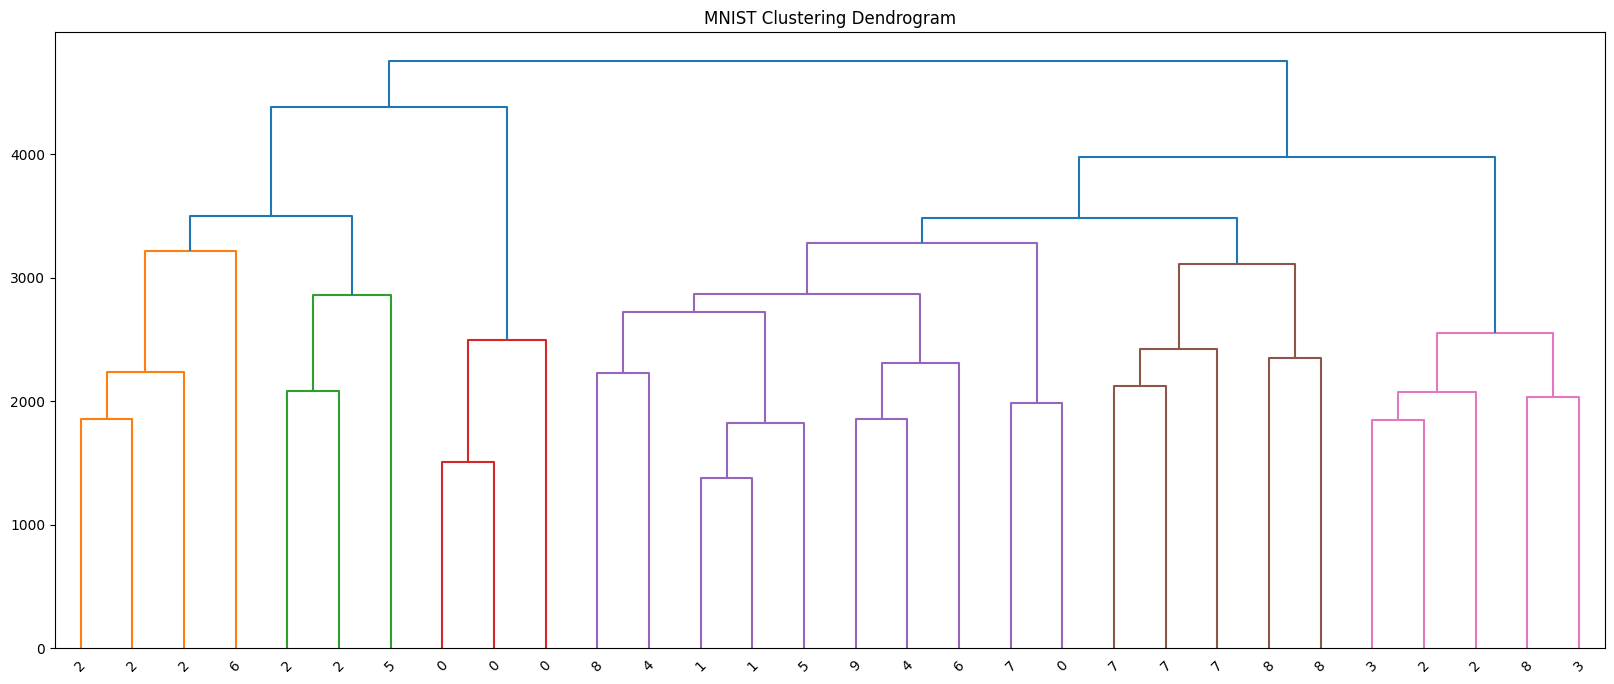

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("MNIST Clustering Dendrogram")
plot_dendrogram(model, flatten_y)
plt.show()

In [ ]:
from torchvision.datasets import CIFAR10

In [ ]:
flatten_cifar10 = CIFAR10(".", train=False, download=True, transform=transforms)

100%|██████████| 170M/170M [00:02<00:00, 57.1MB/s]


In [ ]:
cifar10_indices = np.random.choice(len(flatten_cifar10), 30, replace=False)

In [ ]:
flatten_X = np.array([flatten_cifar10[idx][0].numpy() for idx in cifar10_indices])
flatten_y = np.array([flatten_cifar10[idx][1] for idx in cifar10_indices])

In [ ]:
model = AgglomerativeClustering(compute_distances=True)
model = model.fit(flatten_X)

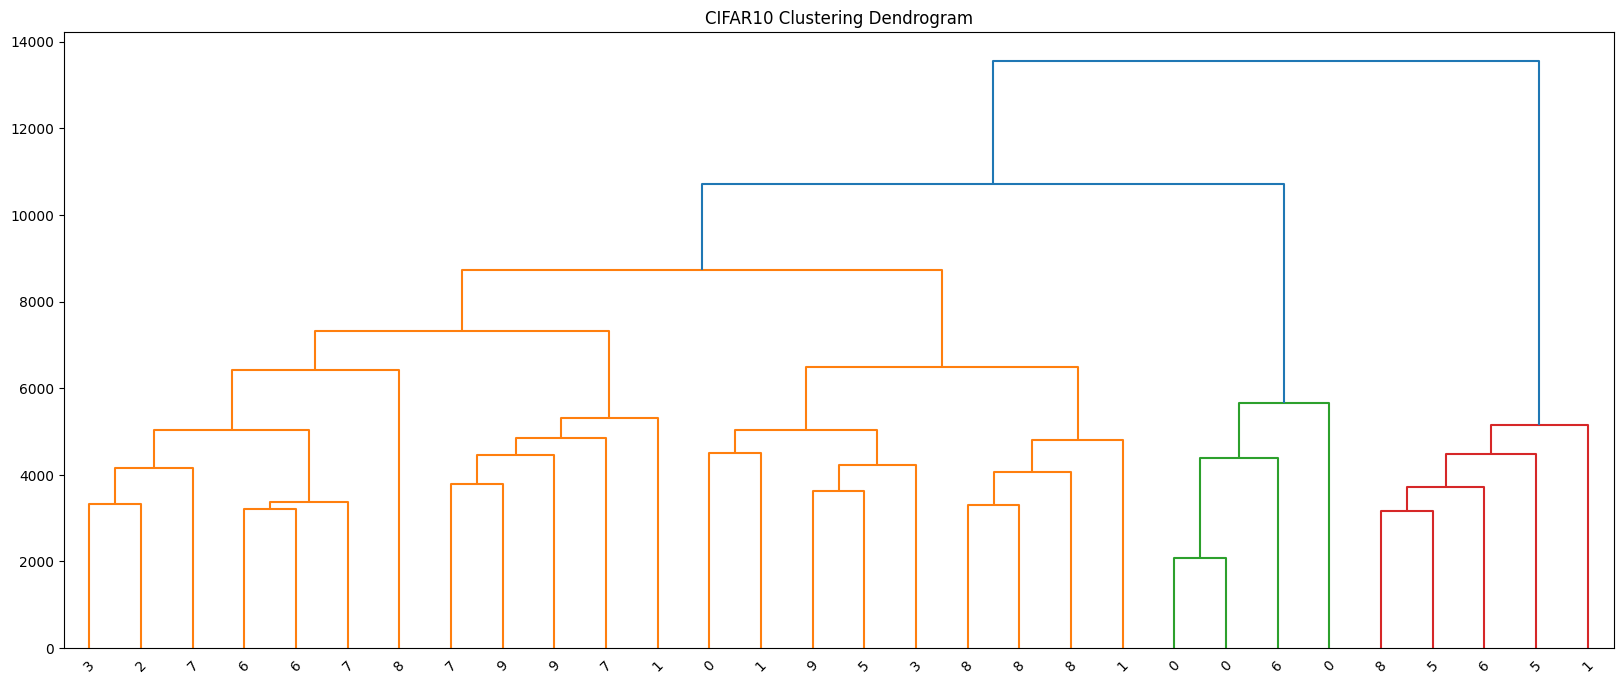

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("CIFAR10 Clustering Dendrogram")
plot_dendrogram(model, flatten_y)
plt.show()

- 적절한 군집 수 k를 가늠할 수 있음
    - 세로축(높이): 두 클러스터가 병합될 때의 거리

    ex. 세로로 큰 간격이 생기는 지점 바로 아래에 수평선을 그으면 그 선과 만나는 가지 개수가 자연스러운 k가 됨

    - 예) 세로가 3 -> 2개로 병합될 때 가장 큰 간격이 되었다면
        k = 3 이 데이터 구조를 잘 설명할 가능성이 큼

</br>

- 군집 간 유사도를 확인할 수 있음
    - 높은 위치에서 합쳐지는 두 클러스터일수록 서로 멀고 구분이 잘 안된다는 뜻
    - 낮은 높이에서 바로 합쳐지면 가깝고 비슷하다는 뜻

In [ ]:
transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])  # ImageNet 기반

In [ ]:
normal_cifar10 = CIFAR10(".", train=False, download=True, transform=transforms)

normal_X = torch.stack([normal_cifar10[idx][0] for idx in cifar10_indices])
normal_y = np.array([normal_cifar10[idx][1] for idx in cifar10_indices])
normal_y

array([6, 3, 8, 6, 7, 1, 0, 9, 5, 8, 6, 9, 1, 5, 2, 7, 0, 7, 1, 0, 0, 6,
       3, 8, 8, 9, 1, 8, 5, 7])

In [ ]:
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights

In [ ]:
feature_extractor = resnet18(weights=ResNet18_Weights.DEFAULT)
feature_extractor

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 모델의 fc층을 아무 연산도 하지 않는 층으로 교체
# 파라미터 없음. 연산 없음
# 피처 추출 전용(backbone)으로 사용하기 위함
feature_extractor.fc = nn.Identity()

In [ ]:
feature_X = feature_extractor(normal_X).detach().numpy()
# 분류가 없는 상태에서 결과를 추출한 것
feature_X

array([[1.3213383 , 0.84684217, 1.0053906 , ..., 0.83199936, 0.        ,
        0.6355228 ],
       [0.        , 0.        , 0.        , ..., 8.524711  , 3.7137005 ,
        0.        ],
       [0.515726  , 0.        , 0.        , ..., 0.32266223, 1.4728183 ,
        0.        ],
       ...,
       [0.5772192 , 0.7121287 , 0.01978162, ..., 0.65148675, 1.3684964 ,
        1.4148082 ],
       [0.7430557 , 0.        , 2.0633652 , ..., 0.5895468 , 0.6749586 ,
        0.        ],
       [0.        , 0.        , 5.1838355 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
model = AgglomerativeClustering(compute_distances=True)
model = model.fit(feature_X)

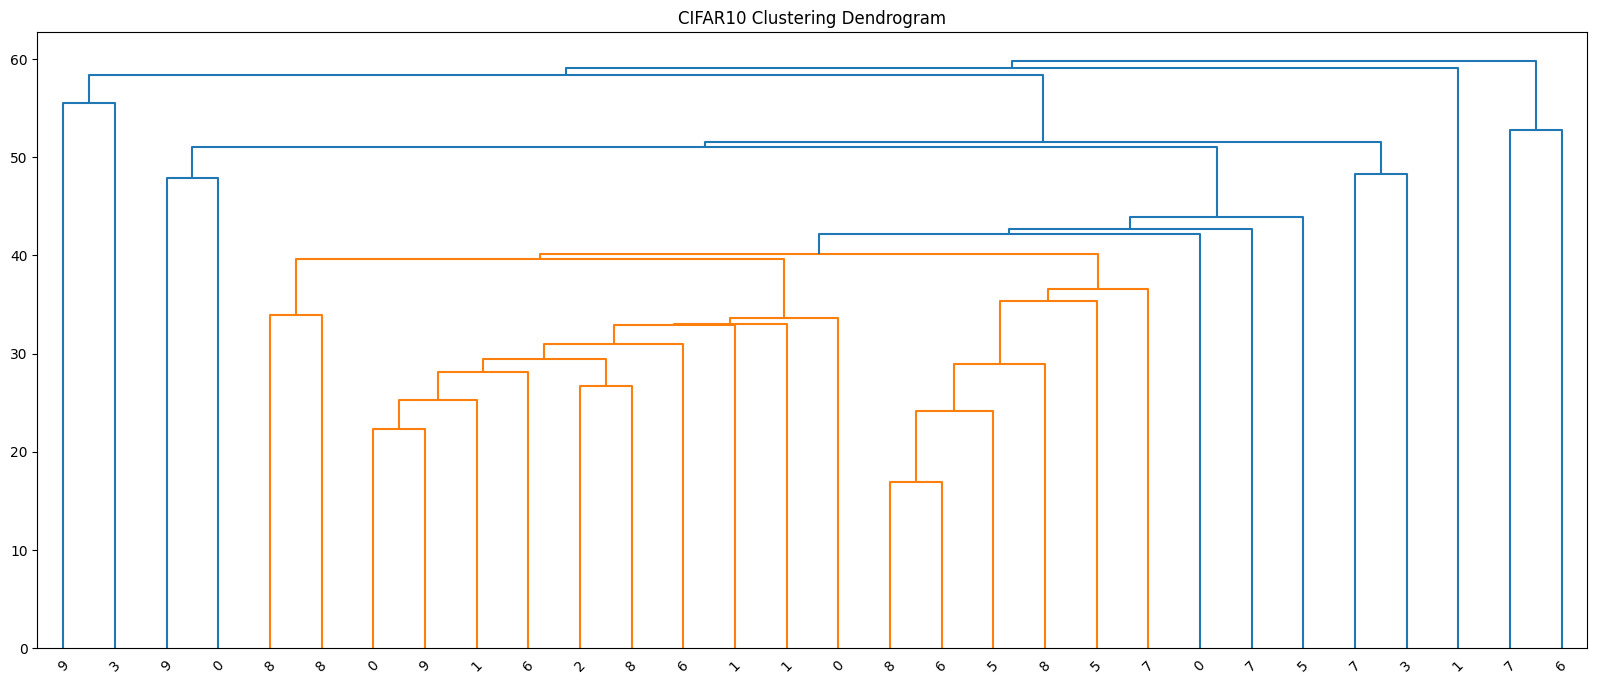

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("CIFAR10 Clustering Dendrogram")
plot_dendrogram(model, normal_y)
plt.show()

# **3. 차원축소**

###3-1. 차원의 저주
차원의 저주(Curse of Dimensionality)란 데이터의 차원이 증가할수록 공간의 부피가 기하급수적으로 커져서, 기존에 효과적이던 알고리즘이나 분석 방법들이 성능이 급격히 떨어지는 현상을 말합니다. 고차원에서는 데이터가 희소하게 분포되며, 거리 기반 알고리즘(예: KNN, 클러스터링 등)은 모든 점 사이의 거리가 비슷해지는 문제를 겪게 되고, 학습에 필요한 데이터 양도 급격히 증가합니다. 따라서 차원이 너무 높아지면 오히려 예측 정확도나 일반화 성능이 나빠질 수 있어, 이를 해결하기 위해 차원 축소 기법(PCA, t-SNE 등)이 자주 사용됩니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2Fr5jo7%2FbtsPF9s5Sgh%2FAAAAAAAAAAAAAAAAAAAAAH6oskh4XRxFZEQ0H8QAcWxB-fmpylozU3o5B6u3meoz%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3Dyl%252F7BIyx4sC1QvtBuSWP4AMf15U%253D' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2Fcj8jmU%2FbtsPXS4I15L%2FAAAAAAAAAAAAAAAAAAAAAHA6f6EA5yKhVIxasWVkbmHoZejDZF7uxQYbnAPyIHkt%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DL2zIVagx5xUWZunuOT1l%252B%252FlbjYs%253D' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FcvGAkd%2FbtsPXIVzthq%2FAAAAAAAAAAAAAAAAAAAAAD39UA6bgMtNDu3ly5kST2NfQMVK0mYYHahnIQd3XUa_%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3D7RamOgGCrkHiEfeS1c7V2NMlR1E%253D' width=600>

###3-2. 차원축소
차원 축소(Dimensionality Reduction)는 고차원 데이터를 더 낮은 차원의 공간으로 변환하여 데이터의 핵심 구조나 패턴을 유지하면서 불필요한 정보나 노이즈를 제거하는 과정입니다. 주로 데이터의 시각화, 계산 효율성 향상, 과적합 방지 등을 목적으로 사용되며, 대표적인 기법으로는 PCA(주성분 분석), t-SNE, UMAP 등이 있습니다. 차원 축소는 수백 개의 변수로 구성된 복잡한 데이터를 2차원이나 3차원으로 압축해도 주요 정보를 유지할 수 있도록 도와주며, 특히 데이터 간의 유사성이나 군집 구조를 직관적으로 파악하는 데 유용한 도구입니다.

# **4. PCA**
PCA(주성분 분석, Principal Component Analysis)는 고차원 데이터를 보다 낮은 차원으로 변환하면서도, 데이터의 분산(정보)을 최대한 보존하는 차원 축소 기법입니다. PCA는 원본 데이터에서 상관관계를 분석해 가장 큰 분산을 가지는 방향(주성분)을 찾고, 이 방향을 기준으로 데이터를 재투영하여 주요 특성만 남깁니다. 이를 통해 노이즈를 줄이고 계산 효율을 높이며, 시각화나 전처리에 유용하게 활용됩니다. PCA는 선형 변환 기법이며, 각 주성분은 서로 직교(orthogonal)합니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FcqS6e6%2FbtsPHY47uVs%2FAAAAAAAAAAAAAAAAAAAAABkAnzA9GHCSidhTc94LFwHsgumkaHnzEx1eFmy3Q3p5%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DyMr8vclztQqnLwZiXVY8tA7oJYM%253D' width=600>

### PCA의 단점
- 데이터 구조가 비선형(곡선 형태, 매니폴드 구조)이면 중요한 패턴을 잃어버릴 수 있음
- 변수마다 단위나 범위가 다르면, 분산이 큰 변수 쪽에서 주성분이 치우치게 됨(PCA 사용하려면 반드시 표준화가 필요함)
- PCA는 분산이 큰 방향을 중요하게 생각하기 때문에 노이즈가 크면 잘못된 축을 잡을 수 있음

# **5. 매니폴드 가정(Manifold Hypothesis)**
매니폴드 가정(Manifold Assumption)은 고차원 데이터가 실제로는 훨씬 더 낮은 차원의 매끄러운 곡면(매니폴드) 위에 놓여 있다고 보는 가정입니다. 즉, 데이터는 전체 고차원 공간을 가득 채우는 것이 아니라, 저차원 구조를 따라 분포한다는 의미입니다. 이 가정은 차원 축소 기법(PCA, t-SNE, Isomap 등)이나 딥러닝에서의 표현 학습에서 핵심적인 이론적 기반이 되며, 복잡해 보이는 데이터도 저차원에서의 규칙성과 구조를 통해 더 잘 이해하고 처리할 수 있다는 통찰을 제공합니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2Fdl4XVe%2FbtsPWoDl3uq%2FAAAAAAAAAAAAAAAAAAAAAGjUJFJ7Lr9XrGfoyqXDN76PnuVXFEfKZqp6fjwAJ5r4%2Fimg.webp%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DnlnnoRi61sdnrt7tlPlPIvv%252BphE%253D' width=600>

# **6. t-SNE**
t-SNE(t-Distributed Stochastic Neighbor Embedding)는 고차원 데이터를 2차원이나 3차원으로 줄여 시각화하는 데 자주 쓰이는 차원 축소 기법입니다. 이 방법은 매니폴드 가정(manifold assumption)에 기반하여, 고차원 데이터가 사실은 저차원 매니폴드 위에 놓여 있다고 보고 국소적인 구조(근접한 점들의 관계)를 잘 보존하도록 합니다. 구체적으로는 고차원 공간에서 이웃한 점들이 가질 확률 분포와 저차원 공간에서의 확률 분포가 비슷해지도록 최적화하며, 특히 t-분포를 사용해 군집 사이의 거리를 더 넓게 벌려주는 효과를 냅니다. 이 덕분에 t-SNE는 복잡한 데이터의 잠재적인 패턴을 시각적으로 잘 드러낼 수 있습니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FbsQLGm%2FbtsPE3UEriW%2FAAAAAAAAAAAAAAAAAAAAAJ1jDLTCcZtuzhJRFhszVdTBl5-eQUyTo97QCFSObUDq%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3D4Bt%252FvxtgIjXfBf6t2sUCoCz3Dts%253D' width=600>

### t-분포를 사용하는 이유
* 정규분포(가우시안): 가운데 뾰족하고, 멀리 가면 값이 너무 빨리 작아짐 → 멀리 떨어진 점들을 잘 구별 못함
* t-분포: 가운데는 정규랑 비슷하지만, 꼬리가 두꺼움 → 멀리 떨어진 점도 “완전히 0” 취급하지 않고, 적당히 떨어져 있다고 표현 가능

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2Fell8Ar%2FbtsPUbE8Bfr%2FAAAAAAAAAAAAAAAAAAAAAJvXWX2FnOpZuWSpRGkCkoI0gOgg7L6PrFiZzSGyam3Q%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DqQ57Tqr5bEJHOz41p3uc0jrW6bI%253D' width=600>

# **7. UMAP**
UMAP(Uniform Manifold Approximation and Projection)은 고차원 데이터를 저차원 공간으로 효율적으로 축소하는 비선형 차원 축소 기법으로, t-SNE보다 속도가 빠르고 전체 구조와 국소 구조를 모두 잘 보존하는 것이 특징입니다. UMAP은 매니폴드 가정과 위상 공간 이론을 바탕으로, 고차원 공간에서의 이웃 관계를 저차원에서도 유지하려고 하며, 군집의 형태나 거리, 밀도 정보까지 어느 정도 보존합니다. 따라서 시각화뿐만 아니라, 클러스터링 전처리, 특징 추출, 노이즈 제거 등 다양한 머신러닝 작업에 활용됩니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2Fpq3kT%2FbtsPFiD4WC3%2FAAAAAAAAAAAAAAAAAAAAALMjhDCtib32PTrmOLHThUO2Hj0OVO-b_37w6Cwarv4Q%2Fimg.jpg%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3D%252FmR78nE%252Byqtrb%252FkvXk%252FmjxcDd5E%253D' width=600>

최근 연구에서는 t-SNE와 UMAP의 초기값 설정(initialization)이 시각화 품질과 신뢰도에 큰 영향을 미친다는 의견이 많아지고 있습니다. 특히 t-SNE에서는 초기값을 PCA로 설정할 경우, 랜덤 초기화보다 더 안정적인 구조 보존과 재현성이 높아지는 것으로 보고되고 있으며, UMAP에서도 PCA 기반 초기화가 더 나은 전역 구조를 유지한다는 결과가 나타나고 있습니다. 이러한 논의는 차원 축소 결과에 대한 해석의 신뢰성을 높이기 위한 중요한 고려 요소로, 단순히 알고리즘만 선택하는 것이 아니라 초기화 방법까지 설계에 포함해야 한다는 인식이 확산되고 있습니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FcIUmfm%2FbtsPHD1lSqe%2FAAAAAAAAAAAAAAAAAAAAABSdabQphEEYB150ZrmYIAVkqaKAZFg9zPyPSG_aj_Vg%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3D0g%252Bk84qE%252FmneJl0Sodr2a6nd350%253D' width=600>

In [1]:
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torchvision.datasets import MNIST, CIFAR10

In [2]:
mnist = MNIST(root='.', train=True, download=True)
cifar10 = CIFAR10(root='.', train=True, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.72MB/s]
100%|██████████| 170M/170M [00:03<00:00, 49.4MB/s]


In [3]:
def convert_sklearn_dataset(pytorch_dataset):
    X, y = [], []
    for image, label in pytorch_dataset:
        x = np.array(image)
        x = x / 255
        X.append(x)
        y.append(label)
    X = np.array(X)
    X = X.reshape(len(X), -1)
    y = np.array(y)
    return X, y

In [5]:
mnist_X, mnist_y = convert_sklearn_dataset(mnist)
cifar10_X, cifar10_y = convert_sklearn_dataset(cifar10)

In [4]:
# 퍼플렉서티 = 유효 이웃 수. 작게 잡으면 국소 구조 강조, 크게 잡으면 전역 구조 반영이며,
# 데이터 수와 구조에 맞춰 5–50(혹은 100) 사이에서 몇 개 값을 시험해 가장 안정적이고 해석 가능한 시각화를 고르는 것이 가장 안전
tsne_random = TSNE(n_components=2, perplexity=200, init="random", random_state=2025)
tsne_pca = TSNE(n_components=2, perplexity=200, init="pca", random_state=2025)

In [6]:
np.random.seed(2025)
mnist_idx = np.random.choice(len(mnist_X), 1000, replace=False)
cifar10_idx = np.random.choice(len(cifar10_X), 1000, replace=False)

In [7]:
def plot_embedding(model, X, y, idx):
    X_set = X[idx]
    y_set = y[idx]

    X_set = model.fit_transform(X_set)
    class_names = set(y_set)

    for i, class_name in enumerate(class_names):
        plt.scatter(
            X_set[y_set == class_name, 0],
            X_set[y_set == class_name, 1],
            color=plt.cm.tab10(i),
            label=class_name,
        )
    plt.xlabel('component 0')
    plt.ylabel('component 1')
    plt.legend()
    plt.show()

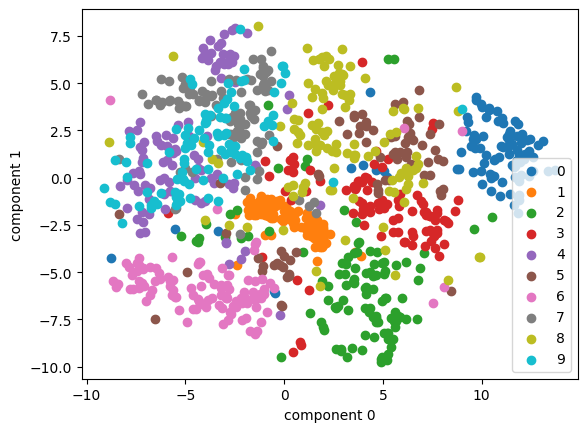

In [8]:
plot_embedding(tsne_random, mnist_X, mnist_y, mnist_idx)

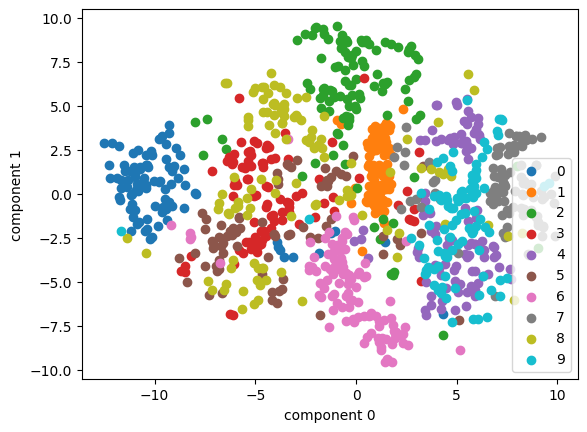

In [9]:
plot_embedding(tsne_pca, mnist_X, mnist_y, mnist_idx)

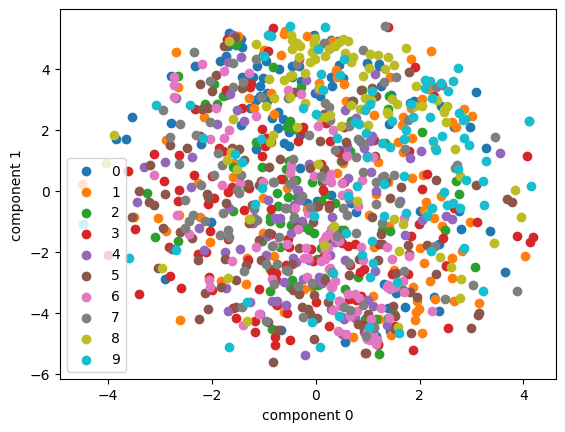

In [10]:
plot_embedding(tsne_random, cifar10_X, cifar10_y, cifar10_idx)

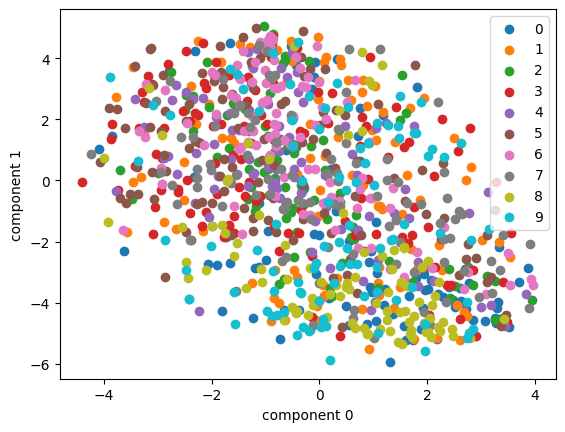

In [11]:
plot_embedding(tsne_pca, cifar10_X, cifar10_y, cifar10_idx)

In [12]:
!pip install umap-learn

In [29]:
# min_dist: 저차원 공간에서 점들이 얼마나 뭉칠 수 있는지를 조절
# n_neighbors: 가까운 이웃으로 간주하는 점의 개수, 값이 작으면 국소 구조위주로 표현, 값이 크면 전역 구조까지 고려
umap = UMAP(n_components=2, min_dist=.05, n_neighbors=8, random_state=2025) # 저차원 공간에서 얼마나 빽빽하게 보여줄지 작을수록 클러스터가 조밀하게 나오고 크면 퍼지게 나옴

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


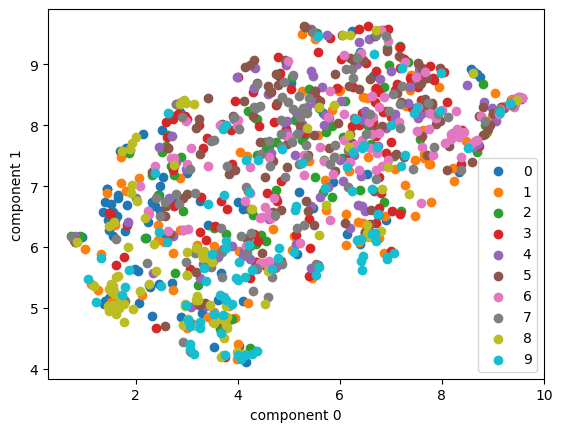

In [14]:
plot_embedding(umap, cifar10_X, cifar10_y, cifar10_idx)

In [15]:
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights

In [16]:
feature_extractor = resnet18(weights=ResNet18_Weights.DEFAULT)
feature_extractor.fc = nn.Identity()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 67.8MB/s]


In [17]:
import torch
from torchvision.transforms import v2

In [19]:
transforms = v2.Compose([
    v2.ToImage(),
    # antialia=True, 크기를 줄일 때, 키울 때 생기는 깨짐(계단 현상)을 줄여서 부드럽게 리사이즈
    v2.Resize(size=(96, 96), antialias=True),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [20]:
cifar10_imagenet = CIFAR10(root='.', train=True, download=True, transform=transforms)

In [21]:
cifar10_imagenet_X = torch.stack([cifar10_imagenet[idx][0] for idx in cifar10_idx])
cifar10_imagenet_y = np.array([cifar10_imagenet[idx][1] for idx in cifar10_idx])
feature_X = feature_extractor(cifar10_imagenet_X).detach().numpy()

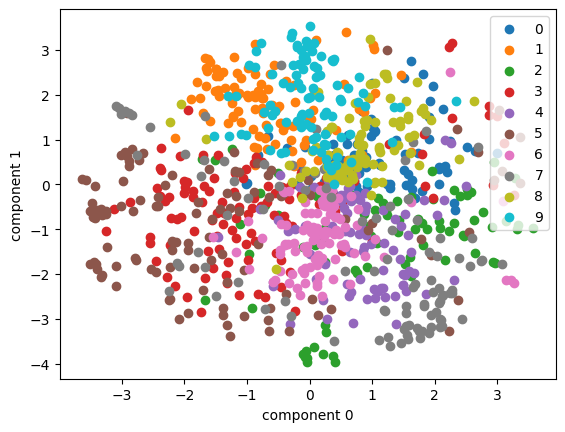

In [22]:
plot_embedding(tsne_pca, feature_X, cifar10_imagenet_y, list(range(len(cifar10_imagenet_y))))

In [23]:
!pip install medmnist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 829.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [24]:
import medmnist
print(f"MedMNIST v{medmnist.__version__}")

MedMNIST v3.0.2


In [25]:
from medmnist import INFO

pathmnist_info = INFO['pathmnist']
pathmnist_info

{'python_class': 'PathMNIST',
 'description': 'The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.',
 'url': 'https://zenodo.org/records/10519652/files/pathmnist.npz?download=1',
 'MD5': 'a8b06965200029087d5bd730944a56c1',
 'url_64': 'https://zenodo.org/records/10519652/files/pathmnist_64.npz?download=1',
 'MD5_64': '55aa9c1e0525abe5a6b9d8343a507616',
 'url_128': 'https://zenodo.org/records/10519652/files/pathmnist_128.npz?download=1',
 'MD5

In [27]:
DataClass = getattr(medmnist, pathmnist_info['python_class'])
DataClass

medmnist.dataset.PathMNIST

100%|██████████| 206M/206M [00:45<00:00, 4.50MB/s]


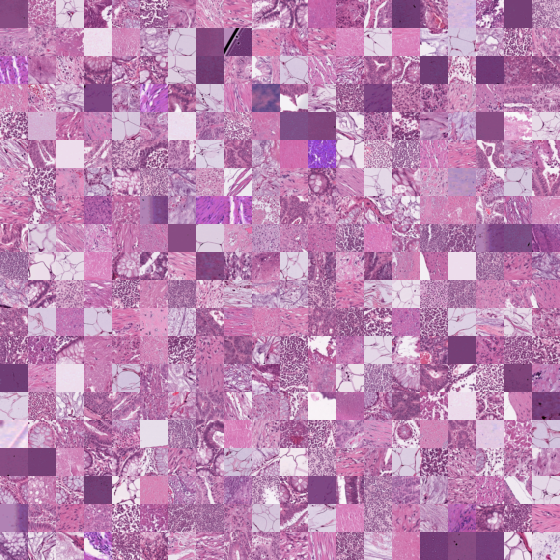

In [28]:
pathmnist = DataClass(split='train', download=True)
pathmnist.montage(length=20)

In [32]:
pathmnist_X, pathmnist_y = convert_sklearn_dataset(pathmnist)
pathmnist_y = pathmnist_y[:, 0]
pathmnist_y

array([0, 4, 7, ..., 2, 0, 2])

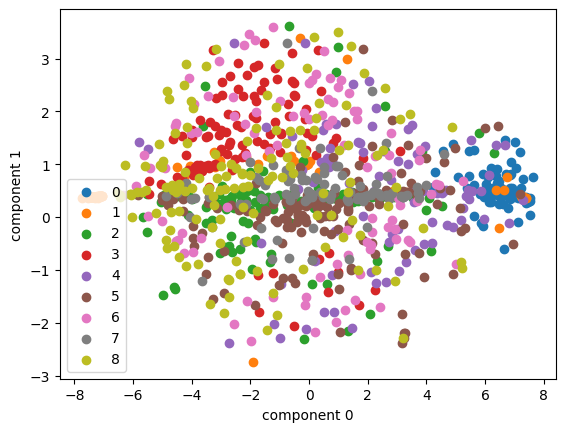

In [33]:
pathmnist_idx = np.random.choice(len(pathmnist_X), 1000, replace=False)

plot_embedding(tsne_random, pathmnist_X, pathmnist_y, pathmnist_idx)

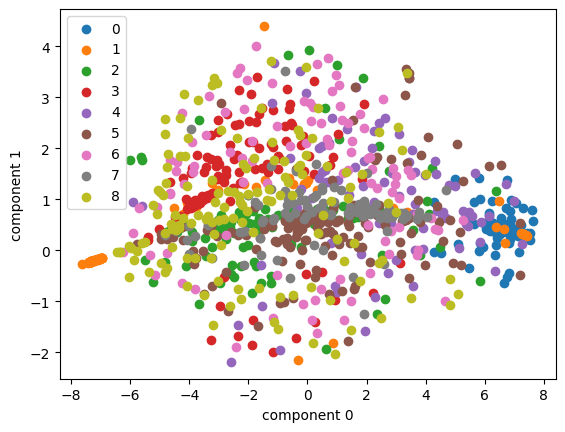

In [34]:
plot_embedding(tsne_pca, pathmnist_X, pathmnist_y, pathmnist_idx)

In [35]:
pathmnist_imagenet = DataClass(split='train', download=True, transform=transforms)
pathmnist_imagenet_X = torch.stack([pathmnist_imagenet[idx][0] for idx in pathmnist_idx])
pathmnist_imagenet_y = np.array([pathmnist_imagenet[idx][1] for idx in pathmnist_idx])[:, 0]
feature_X = feature_extractor(pathmnist_imagenet_X).detach().numpy()

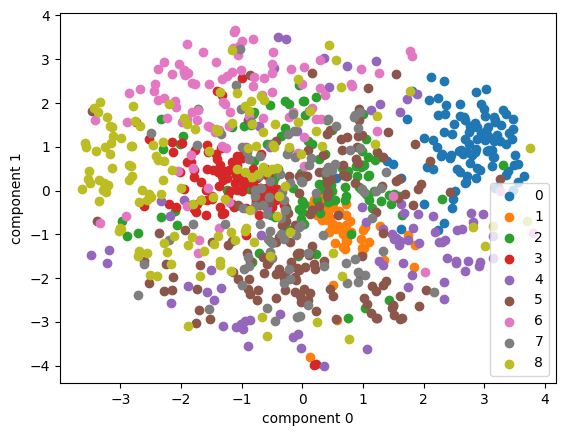

In [36]:
plot_embedding(tsne_pca, feature_X, pathmnist_imagenet_y, list(range(len(pathmnist_imagenet_y))))